# Other Clustering Algorithms

In [3]:
from sklearn import datasets
from sklearn.metrics import adjusted_mutual_info_score

import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns

%matplotlib inline

## Spectral Clustering

Spectral clustering uses the distance matrix to define the Laplacian Matrix and transform the dataset by eigendecomposition. The implementation of scikit-learn uses K-means for obtaining the clusters n the transformed dataset (also a 'discretization' method can be applied).

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 15.7 µs


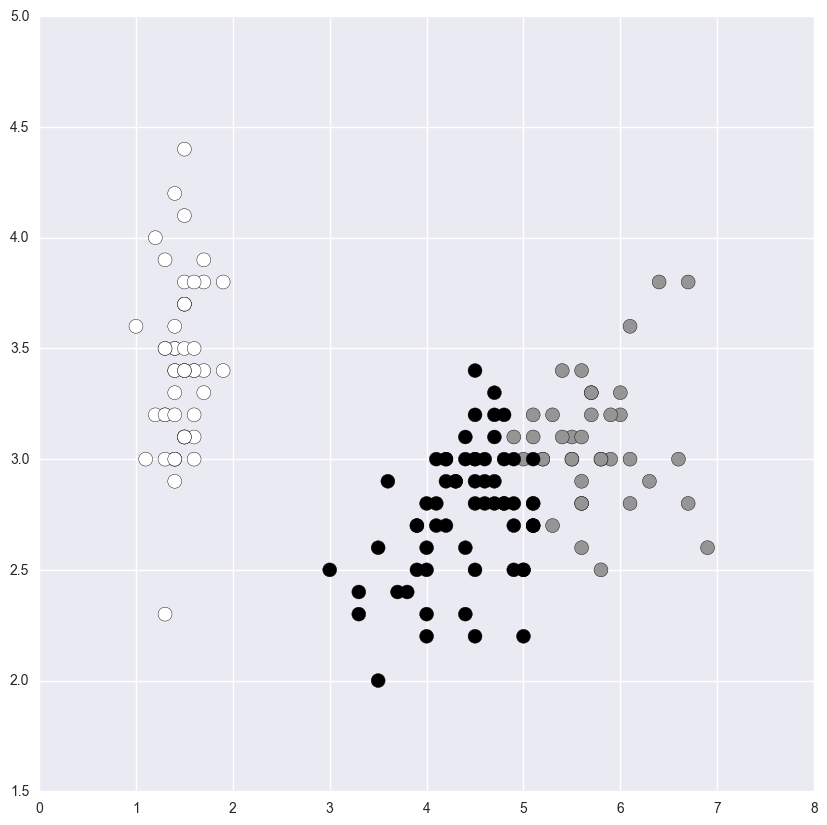

0.757363190893


In [4]:
iris = datasets.load_iris()

from sklearn.cluster import SpectralClustering
spec = SpectralClustering(n_clusters=3)
%time {spec.fit(iris['data'])}

labels = spec.fit_predict(iris['data'])

plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.show()

print(adjusted_mutual_info_score(iris['target'], labels))

By default a RBF kernel is used to define the similarity matrix, but other possibilities like using the distances for only a number of neighbors or applying other kernel functions are possible. This makes this method related to Kernel K-means.

CPU times: user 11 µs, sys: 1e+03 ns, total: 12 µs
Wall time: 14.3 µs


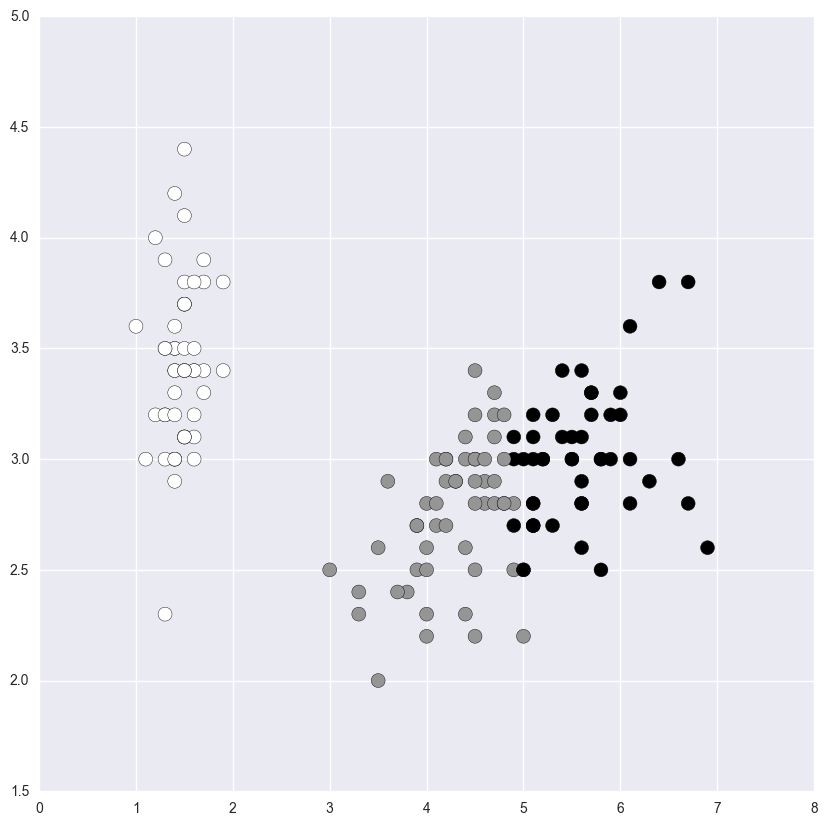

0.833714228101


In [5]:
spec = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=30)
%time {spec.fit(iris['data'])}

labels = spec.fit_predict(iris['data'])

plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.show()

print(adjusted_mutual_info_score(iris['target'], labels))

Depending on the transformation and parameters, the method is able to find non linearly separable clusters, but it is not always the case. You can see what happens with higher number of neighbors.

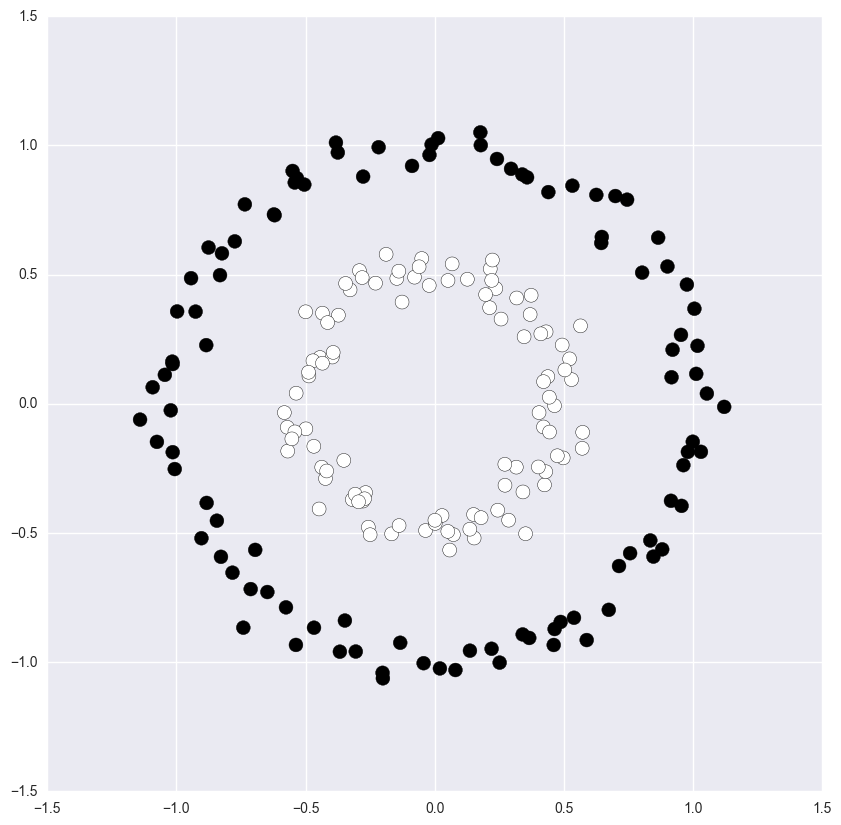

1.0


In [6]:
from sklearn.datasets import make_circles
circles, clabels = datasets.make_circles(n_samples=200, factor=.5, noise=.05)
spec = SpectralClustering(n_clusters=2, affinity="nearest_neighbors", n_neighbors=10)

labels = spec.fit_predict(circles)

plt.figure(figsize=(10,10))
plt.scatter(circles[:, 0], circles[:, 1], c=labels, s=100)
plt.show()

print(adjusted_mutual_info_score(clabels, labels))

## Affinity Propagation

Affinity propagation is related to probabilistical graphical models and is controled only by a parameter, the *damping factor* that controls how many clusters appear (the lower (0.5) the more clusters) buy the exact number of clusters obtained is determined by the algorithm. This example uses damping factor 0.5.

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 12.6 µs
Clusters= 7


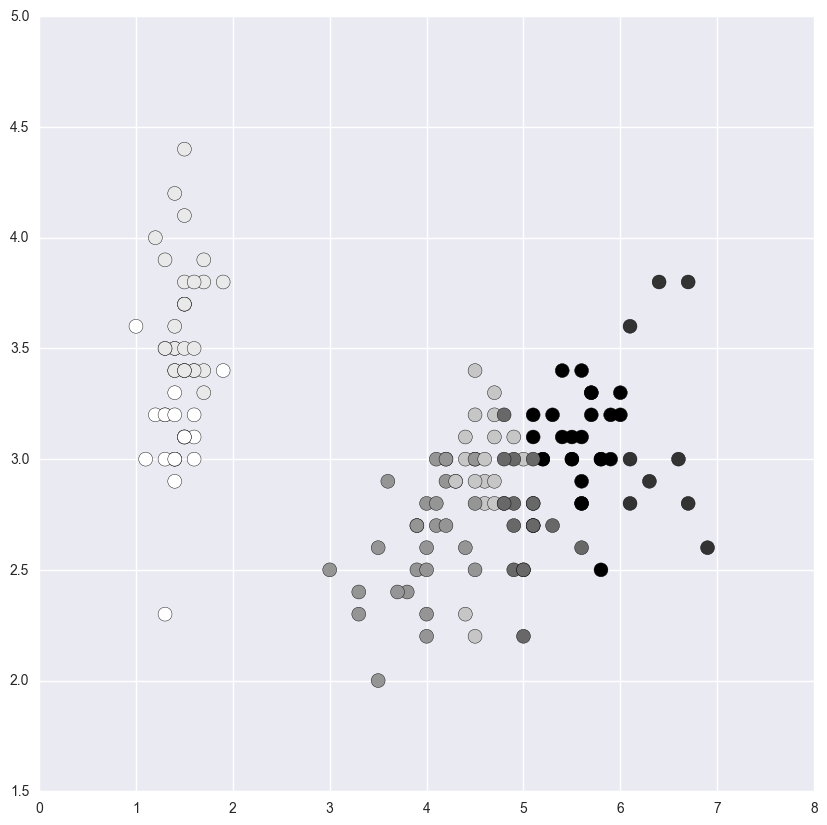

0.516951174435


In [8]:
from sklearn.cluster import AffinityPropagation
import  numpy as np
aff= AffinityPropagation(damping=0.5)
%time {aff.fit(iris['data'])}

labels = aff.predict(iris['data'])
print ('Clusters=', len(np.unique(labels)))

plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.show()

print(adjusted_mutual_info_score(iris['target'], labels))

And now with damping factor 0.98 (a value of 1 does not returns clusters)

CPU times: user 11 µs, sys: 0 ns, total: 11 µs
Wall time: 15 µs
Clusters= 4


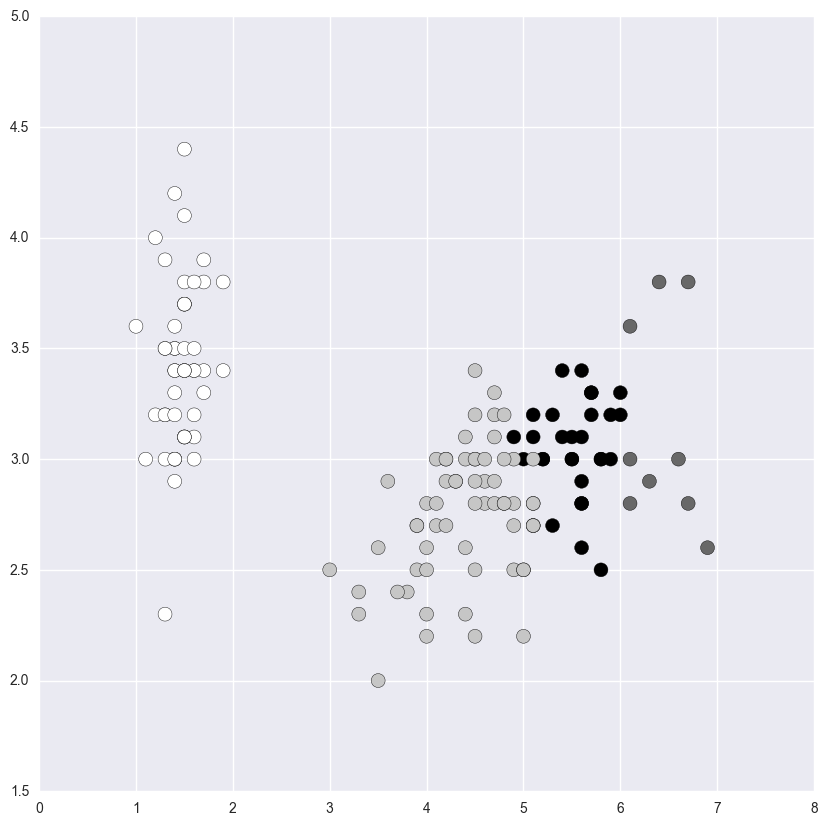

0.675319211828


In [9]:
from sklearn.cluster import AffinityPropagation
aff= AffinityPropagation(damping=0.98)
%time {aff.fit(iris['data'])}

labels = aff.predict(iris['data'])
print ('Clusters=', len(np.unique(labels)))

plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=labels, s=100)
plt.show()

print(adjusted_mutual_info_score(iris['target'], labels))